In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from matplotlib import font_manager, rc
import platform

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')

# pd.set_option('display.max_rows', None)

In [4]:
path = '../07miniproject/data/실습데이터.csv'

df = pd.read_csv(path)
df.head(10)

,거래id,유형,고객id,코스ID,사이트,포맷,카테고리,코스(상품) 이름,거래일자,쿠폰이름,판매가격,결제수단,실거래금액,쿠폰할인액,거래금액,환불금액
0,2417084,PAYMENT,20053,209016,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 김왼손의 파이썬 업무자동화 유치원,2022. 12. 31. 오후 10:12:33,-,189000,TRANSFER,159000,-,159000,-
1,2415408,PAYMENT,58309,210664,FASTCAMPUS,올인원,부동산/금융,초격차 패키지 : 한 번에 끝내는 부동산 금융(PF) 실무,2022. 12. 30. 오후 6:12:57,-,501000,TRANSFER,501000,-,501000,-
2,2413897,PAYMENT,18075,211782,FASTCAMPUS,올인원,영상/3D,편집하는여자의 영상편집 마스터클래스 - 제 6강 다양한 효과를 응용하여 애프터이펙트...,2022. 12. 31. 오후 11:12:15,-,549000,CARD,549000,-,549000,-
3,2413891,PAYMENT,41898,213450,FASTCAMPUS,올인원,프로그래밍,초격차 패키지 : 35개 프로젝트로 배우는 Android 앱 개발 feat. Jet...,2022. 12. 31. 오후 11:12:03,[WELCOME] 프로그래밍 3만원할인,165000,CARD,135000,30000,135000,-
4,2413887,PAYMENT,94328,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:10,-,239000,CARD,239000,-,239000,-
5,2413886,PAYMENT,47039,210773,FASTCAMPUS,올인원,프로그래밍,"초격차 패키지 : 개발자 취업 합격 패스 With 코딩테스트, 기술면접",2022. 12. 31. 오후 11:12:58,-,239000,POINT,239000,-,239000,-
6,2413879,PAYMENT,81643,207628,FASTCAMPUS,올인원,마케팅,"초격차 패키지 : 퍼포먼스 마케팅, 데이터로 완전 정복",2022. 12. 31. 오후 11:12:40,-,213000,CARD,213000,-,213000,-
7,2413876,PAYMENT,86273,214558,FASTCAMPUS,올인원,프로그래밍,[Kit] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지,2022. 12. 31. 오후 11:12:54,[20% 할인] 입문자를 위한 풀스택 웹 개발 Kit : 기획부터 프로젝트까지 기수...,195000,CARD,156000,39000,156000,-
8,2413872,PAYMENT,81432,214298,FASTCAMPUS,올인원,업무 생산성,올인원 패키지 : 랜선사수 피도리와 함께하는 생존 PPT 마스터,2022. 12. 31. 오후 11:12:01,-,130000,CARD,130000,-,130000,-
9,2413869,PAYMENT,21825,213315,FASTCAMPUS,올인원,일러스트,네오아카데미 : 킨티의 58개의 예제를 통해 배우는 캐주얼 캐릭터 완전판,2022. 12. 31. 오후 11:12:51,[WELCOME] 디자인 3만원할인,188000,CARD,158000,30000,158000,-


### 데이터 확인하기

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


### 월별 거래량 vs. 월별 환불량

- 매출이 뛰는 특정 분기/월이 있을까?
- 있다면 이유는 무엇일까?
    - 쿠폰 사용량과 매출은 어떤 관계가 있을까?

In [52]:
df['거래일자']

0         2022. 12. 31. 오후 10:12:33
1          2022. 12. 30. 오후 6:12:57
2         2022. 12. 31. 오후 11:12:15
3         2022. 12. 31. 오후 11:12:03
4         2022. 12. 31. 오후 11:12:10
                    ...            
159323      2022. 1. 1. 오전 12:01:08
159324      2022. 1. 1. 오전 12:01:12
159325      2022. 1. 1. 오전 12:01:21
159326      2022. 1. 2. 오전 11:01:24
159327      2022. 1. 24. 오전 4:01:00
Name: 거래일자, Length: 159328, dtype: object

### Transaction History

#### 월별 거래량

In [53]:
# 거래일자 column에서 월만 추출
record_date = df['거래일자']
record_date = record_date.apply(lambda ret: ret[0:8])
record_date = record_date.value_counts()
record_date

2022. 1.    17875
2022. 12    16343
2022. 7.    14627
2022. 2.    14627
2022. 8.    13665
2022. 10    13614
2022. 9.    13152
2022. 11    12160
2022. 6.    12158
2022. 3.    11166
2022. 4.    10189
2022. 5.     9752
Name: 거래일자, dtype: int64

In [54]:
# 거래 유형 중 '결제'만 추출
transaction_date = df[df['유형']=='PAYMENT']['거래일자']
transaction_date = transaction_date.apply(lambda ret: ret[0:8])
trans_sum = transaction_date.value_counts()
trans_sum

2022. 1.    16600
2022. 12    15104
2022. 7.    13752
2022. 2.    13636
2022. 8.    12746
2022. 10    12731
2022. 9.    12110
2022. 6.    11308
2022. 11    11188
2022. 3.    10437
2022. 4.     9393
2022. 5.     9005
Name: 거래일자, dtype: int64

#### 환불 거래량

In [55]:
# 거래 유형 중 '환불'만 추출
refund_date = df[df['유형']=='REFUND']['거래일자']
refund_date = refund_date.apply(lambda ret: ret[0:8])
refund_sum = refund_date.value_counts()
refund_sum

2022. 1.    1275
2022. 12    1239
2022. 9.    1042
2022. 2.     991
2022. 11     972
2022. 8.     919
2022. 10     883
2022. 7.     875
2022. 6.     850
2022. 4.     796
2022. 5.     747
2022. 3.     729
Name: 거래일자, dtype: int64

In [90]:
# 추출한 컬럼들을 데이터프레임으로 만들기
records_frame = refund_sum.to_frame('refund_record')
records_frame['transaction_record'] = trans_sum.to_frame('transaction_record')
records_frame

,refund_record,transaction_record
2022. 1.,1275,16600
2022. 12,1239,15104
2022. 9.,1042,12110
2022. 2.,991,13636
2022. 11,972,11188
2022. 8.,919,12746
2022. 10,883,12731
2022. 7.,875,13752
2022. 6.,850,11308
2022. 4.,796,9393


<AxesSubplot:>

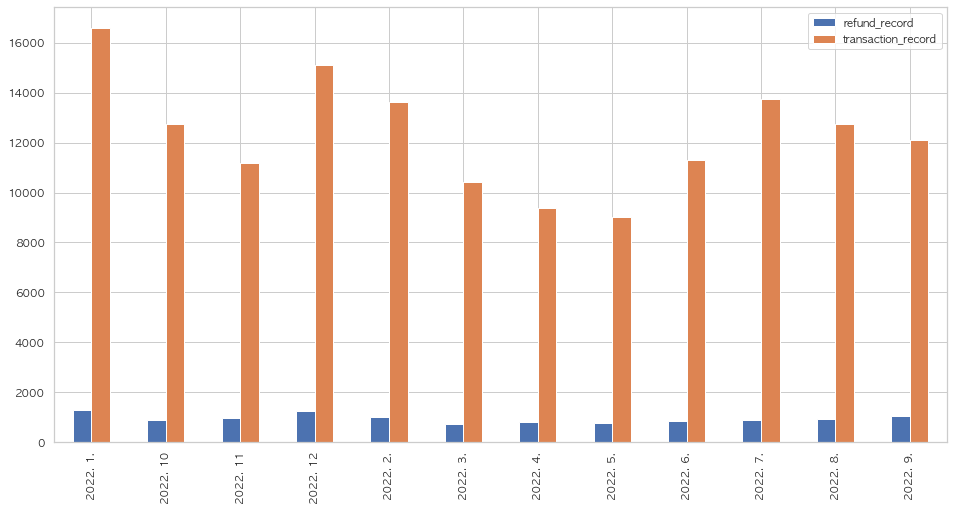

In [67]:
records_frame.plot(kind='bar', figsize=(16, 8))

### 카테고리별

1. 카테고리별로 판매량은 어떻게 될까
2. 카테고리별로 환불량은 어떻게 될까

In [69]:
category = df['카테고리']
category.unique()

array(['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브'], dtype=object)

In [70]:
category_payment = df[df['유형'] == 'PAYMENT']['카테고리'].value_counts()

In [71]:
category_refund = df[df['유형'] == 'REFUND']['카테고리'].value_counts()

In [72]:
categ_frame = category_payment.to_frame('category_payment').sort_index()
categ_frame['category_refund'] = category_refund.to_frame('category_refund')
categ_frame.fillna(0)

,category_payment,category_refund
데이터 사이언스,24867,1992.0
디자인,9396,815.0
마케팅,12023,873.0
부동산/금융,10143,654.0
부업/창업,1018,76.0
업무 생산성,13052,864.0
영상/3D,12981,942.0
일러스트,14258,1185.0
크리에이티브,1,0.0
투자/재테크,2348,135.0


<AxesSubplot:>

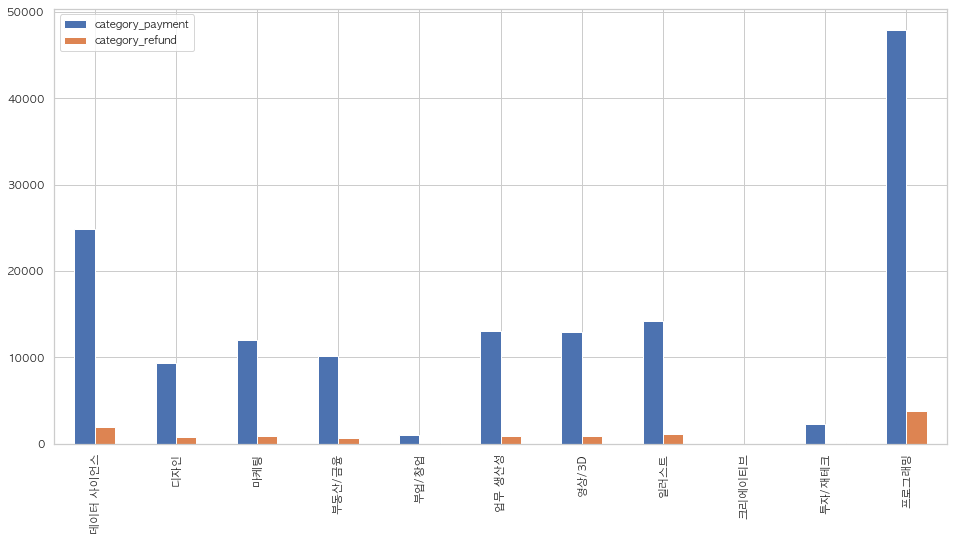

In [73]:
categ_frame.plot(kind='bar', figsize=(16, 8))

### 월별 카테고리 판매량 변화

In [74]:
### 월별로 어떻게 다른지 확인

category_idx = ['업무 생산성', '부동산/금융', '영상/3D', '프로그래밍', '마케팅', '일러스트', '디자인',
       '데이터 사이언스', '부업/창업', '투자/재테크', '크리에이티브']

# 데이터 프레임 생성
cat_frame = pd.DataFrame()

def calculate_payment_by_category(category_item):
  category_payment_date = df[(df['카테고리'] == category_item)&(df['유형'] == 'PAYMENT')]
  category_payment_date = category_payment_date['거래일자']

  category_payment_date = category_payment_date.apply(lambda ret: ret[0:8])
  cate_sum = category_payment_date.value_counts()

  col_name = f"{category_item}_PAYMENT"
  cat_frame[col_name] = cate_sum.to_frame(col_name)


In [75]:
for category_item in category_idx:
  calculate_payment_by_category(category_item)

In [76]:
cat_frame = cat_frame.fillna(0)
cat_frame

,업무 생산성_PAYMENT,부동산/금융_PAYMENT,영상/3D_PAYMENT,프로그래밍_PAYMENT,마케팅_PAYMENT,일러스트_PAYMENT,디자인_PAYMENT,데이터 사이언스_PAYMENT,부업/창업_PAYMENT,투자/재테크_PAYMENT,크리에이티브_PAYMENT
2022. 1.,1733,981,1859,5285,1226,851,1324,2573,233,535,0.0
2022. 2.,1394,907,1482,4274,1074,901,1041,2006,166,391,0.0
2022. 12,1281,939,849,5514,1197,1449,780,2883,70,142,0.0
2022. 7.,1077,1178,1550,4546,952,1074,977,2179,61,158,0.0
2022. 11,1006,705,586,3701,976,1232,589,2250,38,105,0.0
2022. 6.,1005,855,1117,3731,931,769,813,1867,77,143,0.0
2022. 10,965,790,862,4266,1053,1695,618,2276,63,143,0.0
2022. 9.,965,733,767,3993,918,2019,557,2007,43,108,0.0
2022. 4.,932,663,899,2697,829,813,612,1743,62,143,0.0
2022. 5.,924,640,867,2759,826,678,564,1577,55,115,0.0


In [77]:
cat_frame['크리에이티브_PAYMENT'] = cat_frame['크리에이티브_PAYMENT'].apply(lambda x: int(x))

In [78]:
cat_frame

,업무 생산성_PAYMENT,부동산/금융_PAYMENT,영상/3D_PAYMENT,프로그래밍_PAYMENT,마케팅_PAYMENT,일러스트_PAYMENT,디자인_PAYMENT,데이터 사이언스_PAYMENT,부업/창업_PAYMENT,투자/재테크_PAYMENT,크리에이티브_PAYMENT
2022. 1.,1733,981,1859,5285,1226,851,1324,2573,233,535,0
2022. 2.,1394,907,1482,4274,1074,901,1041,2006,166,391,0
2022. 12,1281,939,849,5514,1197,1449,780,2883,70,142,0
2022. 7.,1077,1178,1550,4546,952,1074,977,2179,61,158,0
2022. 11,1006,705,586,3701,976,1232,589,2250,38,105,0
2022. 6.,1005,855,1117,3731,931,769,813,1867,77,143,0
2022. 10,965,790,862,4266,1053,1695,618,2276,63,143,0
2022. 9.,965,733,767,3993,918,2019,557,2007,43,108,0
2022. 4.,932,663,899,2697,829,813,612,1743,62,143,0
2022. 5.,924,640,867,2759,826,678,564,1577,55,115,0


### 월별 카테고리 환불 변화

In [79]:
cat_frame_r = pd.DataFrame()
def calculate_refund_by_category(category_item):
  category_refund_date = df[(df['카테고리'] == category_item)&(df['유형'] == 'REFUND')]
  category_refund_date = category_refund_date['거래일자']

  category_refund_date = category_refund_date.apply(lambda ret: ret[0:8])
  cate_sum = category_refund_date.value_counts()

  col_name = f"{category_item}_REFUND"
  cat_frame_r[col_name] = cate_sum.to_frame(col_name)

In [80]:
for category_item in category_idx:
  calculate_refund_by_category(category_item)

In [81]:
cat_frame_r = cat_frame_r.fillna(0)
cat_frame_r

,업무 생산성_REFUND,부동산/금융_REFUND,영상/3D_REFUND,프로그래밍_REFUND,마케팅_REFUND,일러스트_REFUND,디자인_REFUND,데이터 사이언스_REFUND,부업/창업_REFUND,투자/재테크_REFUND,크리에이티브_REFUND
2022. 1.,114,62,137,417,88,77,110,208,22,40,0.0
2022. 2.,104,42,105,342,85,58,89,135,7,24,0.0
2022. 6.,90,42,83,294,69,56,75,135,5,1,0.0
2022. 5.,75,44,70,244,61,64,46,130,4,9,0.0
2022. 12,72,61,62,440,100,144,76,264,6,14,0.0
2022. 4.,72,45,73,230,49,72,64,172,9,10,0.0
2022. 11,64,72,56,333,81,111,61,185,2,7,0.0
2022. 7.,63,65,94,306,52,73,66,147,4,5,0.0
2022. 10,60,42,58,310,66,150,43,146,4,4,0.0
2022. 9.,58,54,55,343,94,202,46,186,2,2,0.0


In [82]:
cat_frame_r['크리에이티브_REFUND'] = cat_frame_r['크리에이티브_REFUND'].apply(lambda x: int(x))

In [83]:
cat_frame_r

,업무 생산성_REFUND,부동산/금융_REFUND,영상/3D_REFUND,프로그래밍_REFUND,마케팅_REFUND,일러스트_REFUND,디자인_REFUND,데이터 사이언스_REFUND,부업/창업_REFUND,투자/재테크_REFUND,크리에이티브_REFUND
2022. 1.,114,62,137,417,88,77,110,208,22,40,0
2022. 2.,104,42,105,342,85,58,89,135,7,24,0
2022. 6.,90,42,83,294,69,56,75,135,5,1,0
2022. 5.,75,44,70,244,61,64,46,130,4,9,0
2022. 12,72,61,62,440,100,144,76,264,6,14,0
2022. 4.,72,45,73,230,49,72,64,172,9,10,0
2022. 11,64,72,56,333,81,111,61,185,2,7,0
2022. 7.,63,65,94,306,52,73,66,147,4,5,0
2022. 10,60,42,58,310,66,150,43,146,4,4,0
2022. 9.,58,54,55,343,94,202,46,186,2,2,0


#### 시각화 해보기

In [84]:
category_tranx = pd.merge(cat_frame, cat_frame_r, on=cat_frame_r.index)
category_tranx

,key_0,업무 생산성_PAYMENT,부동산/금융_PAYMENT,영상/3D_PAYMENT,프로그래밍_PAYMENT,마케팅_PAYMENT,일러스트_PAYMENT,디자인_PAYMENT,데이터 사이언스_PAYMENT,부업/창업_PAYMENT,...,부동산/금융_REFUND,영상/3D_REFUND,프로그래밍_REFUND,마케팅_REFUND,일러스트_REFUND,디자인_REFUND,데이터 사이언스_REFUND,부업/창업_REFUND,투자/재테크_REFUND,크리에이티브_REFUND
0,2022. 1.,1733,981,1859,5285,1226,851,1324,2573,233,...,62,137,417,88,77,110,208,22,40,0
1,2022. 2.,1394,907,1482,4274,1074,901,1041,2006,166,...,42,105,342,85,58,89,135,7,24,0
2,2022. 6.,1281,939,849,5514,1197,1449,780,2883,70,...,42,83,294,69,56,75,135,5,1,0
3,2022. 5.,1077,1178,1550,4546,952,1074,977,2179,61,...,44,70,244,61,64,46,130,4,9,0
4,2022. 12,1006,705,586,3701,976,1232,589,2250,38,...,61,62,440,100,144,76,264,6,14,0
5,2022. 4.,1005,855,1117,3731,931,769,813,1867,77,...,45,73,230,49,72,64,172,9,10,0
6,2022. 11,965,790,862,4266,1053,1695,618,2276,63,...,72,56,333,81,111,61,185,2,7,0
7,2022. 7.,965,733,767,3993,918,2019,557,2007,43,...,65,94,306,52,73,66,147,4,5,0
8,2022. 10,932,663,899,2697,829,813,612,1743,62,...,42,58,310,66,150,43,146,4,4,0
9,2022. 9.,924,640,867,2759,826,678,564,1577,55,...,54,55,343,94,202,46,186,2,2,0


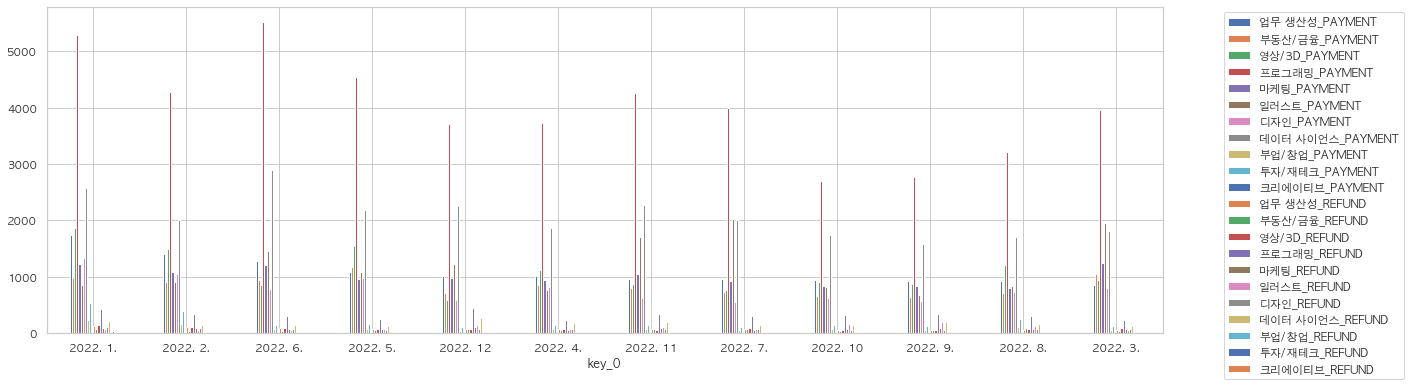

In [85]:
ax1 = category_tranx.plot(kind='bar', x='key_0', rot=0, figsize=(20, 6))
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()